In [4]:
from utils import collect, add_info
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import os
from pruneshift.prune import prune
from pruneshift.prune import simple_prune
from torch.nn.utils import prune as prune_torch
from pruneshift.networks import create_network

hydra_path = Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/mask_selection/finetuning")
weight_path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/subnet_final/global_weight/")
baseline_path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines")

base_model=Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/models/deep_augmix/imagenet100_resnet18.0")

gw_path=[Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/subnet_final/global_weight/resnet18/amda_amda/amda_amda/0/checkpoint/last.ckpt"),
         Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/subnet_final/global_weight/resnet18/amda_amda/amda_amda/1/checkpoint/last.ckpt"),
         Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/subnet_final/global_weight/resnet18/amda_amda/amda_amda/2/checkpoint/last.ckpt"),
         Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/workshop/subnet_final/global_weight/resnet18/amda_amda/amda_amda/3/checkpoint/last.ckpt")]


hydra_good_path=[Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/0/checkpoint/last.ckpt"),
                 Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/1/checkpoint/last.ckpt"),
                 Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/2/checkpoint/last.ckpt"),
                 Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/3/checkpoint/last.ckpt")]

hydra_good=Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hyperparameter_analysis/goodconfig/finetune")

errors = ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]

order = {'Global Weight': 2, 'Layer Weight': 2, 'Hydra': 1, 'Hydra with KD': 0} 

hydra_amda_path = Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/mask_selection/finetuning")

sns.set_context("talk")
sns.set_style("whitegrid")

In [5]:
resnet=create_network('imagenet', 'resnet18', 100, base_model)
gw_10_model=prune(resnet, "global_weight", 10).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
gw_20_model=prune(resnet, "global_weight", 20).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
gw_40_model=prune(resnet, "global_weight", 40).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
gw_80_model=prune(resnet, "global_weight", 80).network

In [6]:
gw_configs=collect(weight_path)
hydra_configs=collect(hydra_good)

ValueError: No objects to concatenate

In [ ]:
#gw_10=gw_path[0]
#from pruneshift.networks import create_network
#gw_10_model=create_network('imagenet', 'resnet18', 100, gw_path[0])
#gw_20_model=create_network('imagenet', 'resnet18', 100, gw_path[1])
#gw_40_model=create_network('imagenet', 'resnet18', 100, gw_path[2])
#gw_80_model=create_network('imagenet', 'resnet18', 100, gw_path[3])

In [10]:
hydra_10=hydra_good_path[0]
from pruneshift.networks import create_network
hydra_10_model=create_network('imagenet', 'resnet18', 100, hydra_good_path[0])
hydra_20_model=create_network('imagenet', 'resnet18', 100, hydra_good_path[1])
hydra_40_model=create_network('imagenet', 'resnet18', 100, hydra_good_path[2])
hydra_80_model=create_network('imagenet', 'resnet18', 100, hydra_good_path[3])

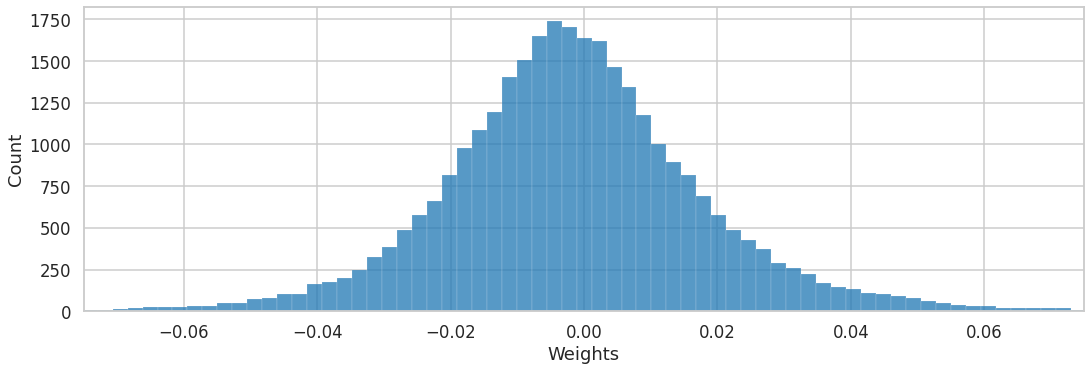

In [44]:
weights_gw_10=[]
for name, param in gw_10_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 10")
#plt.savefig(f"figures/gw_10_weight_dist.pdf")
plt.show()
df_gw_10=df

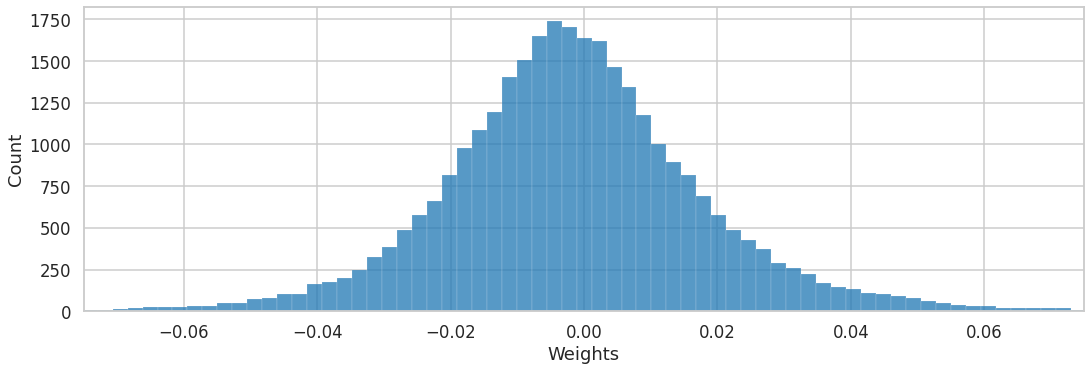

In [17]:
weights_gw_10=[]
for name, param in gw_20_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 20")
#plt.savefig(f"figures/gw_20_weight_dist.pdf")
plt.show()
df_gw_20=df

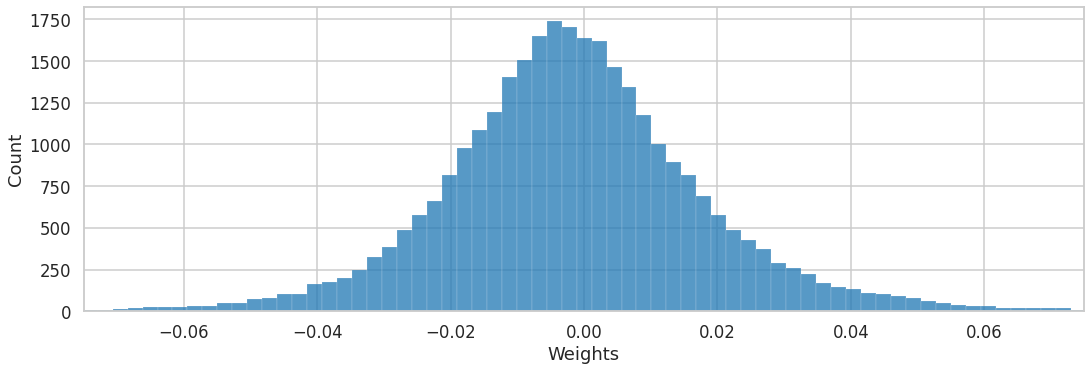

In [18]:
weights_gw_10=[]
for name, param in gw_40_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 40")
#plt.savefig(f"figures/gw_40_weight_dist.pdf")
plt.show()
df_gw_40=df

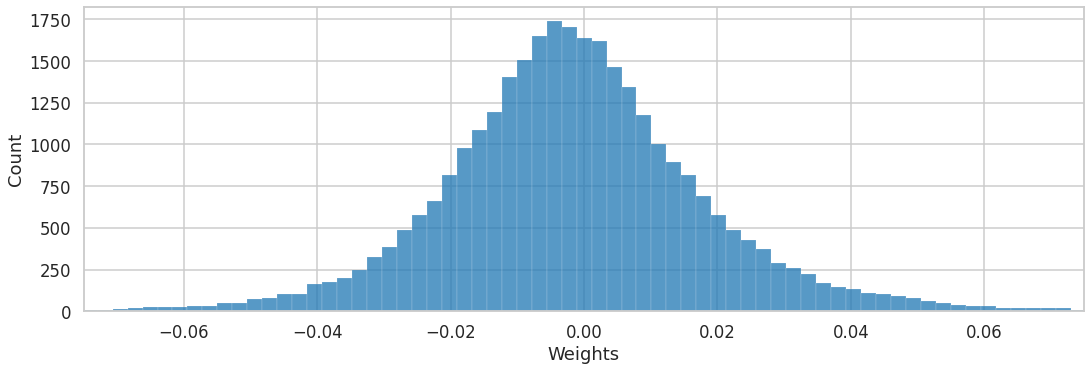

In [8]:
weights_gw_10=[]
for name, param in gw_80_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 80")
#plt.savefig(f"figures/gw_80_weight_dist.pdf")
plt.show()
df_gw_80=df

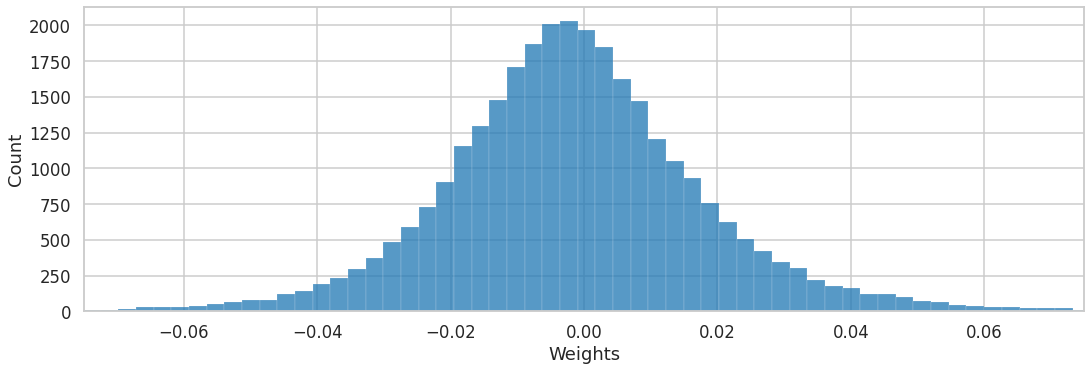

In [45]:
weights_hy_10=[]
for name, param in hydra_10_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_hy_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_hy_10 = np.array(weights_hy_10, dtype=object).flatten()
weights=[]
for a in weights_hy_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 10")
#plt.savefig(f"figures/hy_10_weight_dist.pdf")
plt.show()
df_hy_10=df

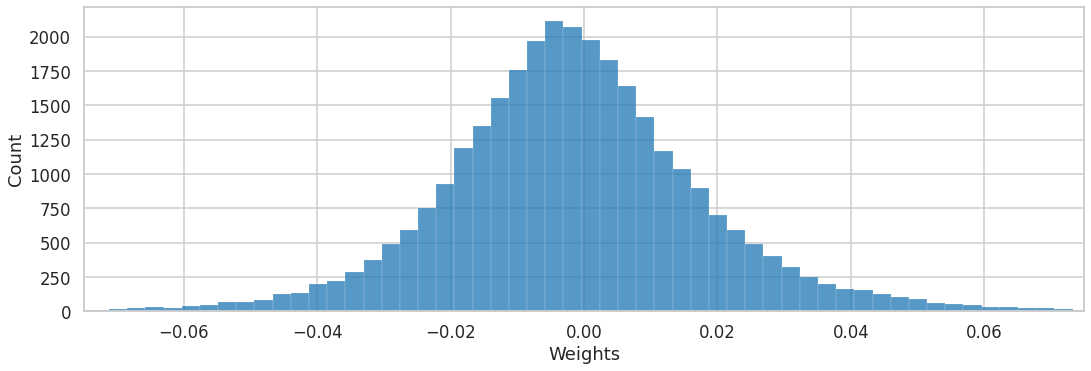

In [12]:
weights_hy_10=[]
for name, param in hydra_20_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_hy_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_hy_10 = np.array(weights_hy_10, dtype=object).flatten()
weights=[]
for a in weights_hy_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 20")
#plt.savefig(f"figures/hy_20_weight_dist.pdf")
plt.show()
df_hy_20=df

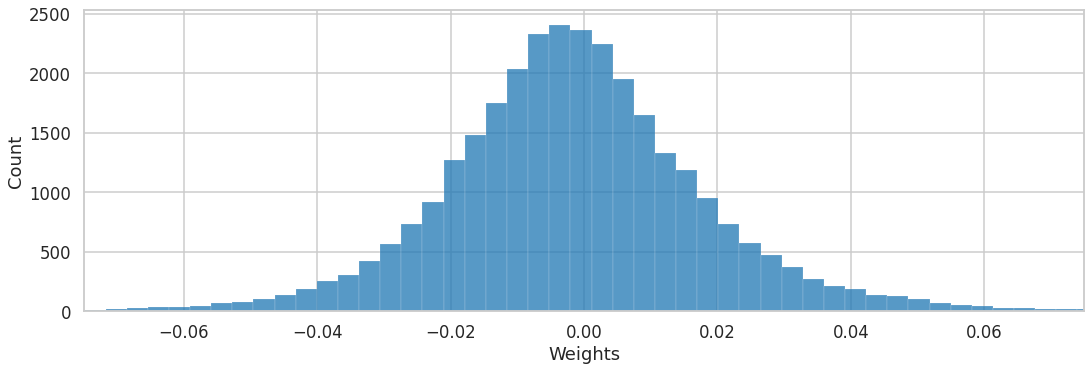

In [13]:
weights_hy_10=[]
for name, param in hydra_40_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_hy_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_hy_10 = np.array(weights_hy_10, dtype=object).flatten()
weights=[]
for a in weights_hy_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 40")
#plt.savefig(f"figures/hy_40_weight_dist.pdf")
plt.show()
df_hy_40=df

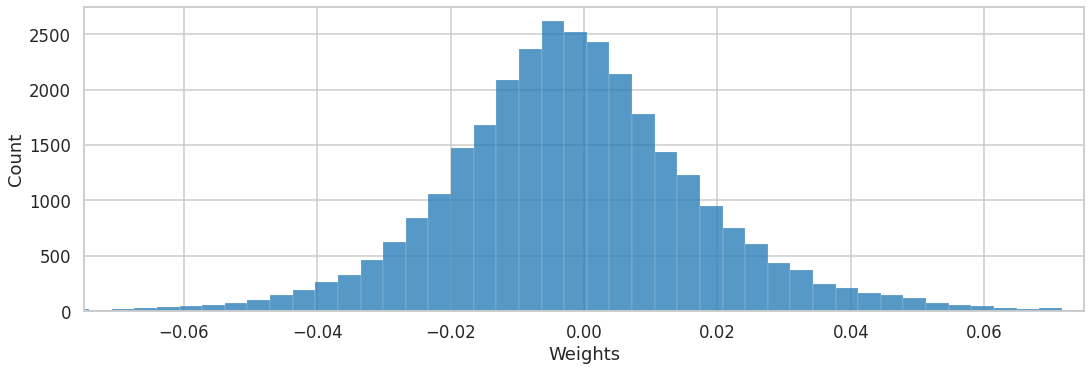

In [14]:
weights_hy_10=[]
for name, param in hydra_80_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_hy_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_hy_10 = np.array(weights_hy_10, dtype=object).flatten()
weights=[]
for a in weights_hy_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 80")
#plt.savefig(f"figures/hy_80_weight_dist.pdf")
plt.show()
df_hy_80=df

In [46]:
gw_str=[]
hy_str=[]
for k in df_gw_10["weights"]:
    gw_str.append("Global_weight")
for k in df_hy_10["weights"]:
    hy_str.append("Hydra")

In [58]:
df_gw_str=pd.DataFrame(gw_str, columns=['Method'])
df_hy_str=pd.DataFrame(hy_str, columns=['Method'])
df_hy_10 = pd.concat([df_hy_10, df_hy_str], axis=1)
df_gw_10 = pd.concat([df_gw_10, df_gw_str], axis=1)
combine_10=pd.concat([df_hy_10, df_gw_10], axis=0)
df_hy_20 = pd.concat([df_hy_20, df_hy_str], axis=1)
df_gw_20 = pd.concat([df_gw_20, df_gw_str], axis=1)
combine_40=pd.concat([df_hy_20, df_gw_20], axis=0)
df_hy_40 = pd.concat([df_hy_40, df_hy_str], axis=1)
df_gw_40 = pd.concat([df_gw_40, df_gw_str], axis=1)
combine_40=pd.concat([df_hy_40, df_gw_40], axis=0)
df_hy_80 = pd.concat([df_hy_80, df_hy_str], axis=1)
df_gw_80 = pd.concat([df_gw_80, df_gw_str], axis=1)
combine_80=pd.concat([df_hy_80, df_gw_80], axis=0)
combine_80

,weights,Method
0,0.161689,Hydra
1,0.143358,Hydra
2,-0.020302,Hydra
3,-0.145745,Hydra
4,0.004563,Hydra
...,...,...
30670,-0.004777,Global_weight
30671,0.000492,Global_weight
30672,-0.012358,Global_weight
30673,-0.011952,Global_weight


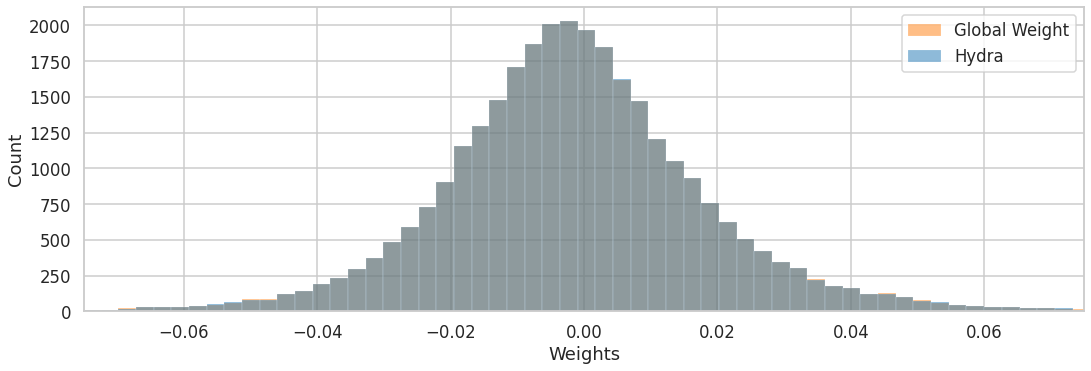

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
#for a in ["global_weight", "Hydra"]:
sns.histplot(combine_10, bins=500, ax=ax, x="weights", multiple="layer", hue="Method")
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 80")
plt.legend(labels=["Global Weight","Hydra"])
plt.savefig(f"figures/combined_gw_hy_10_weight_dist.pdf")
plt.show()

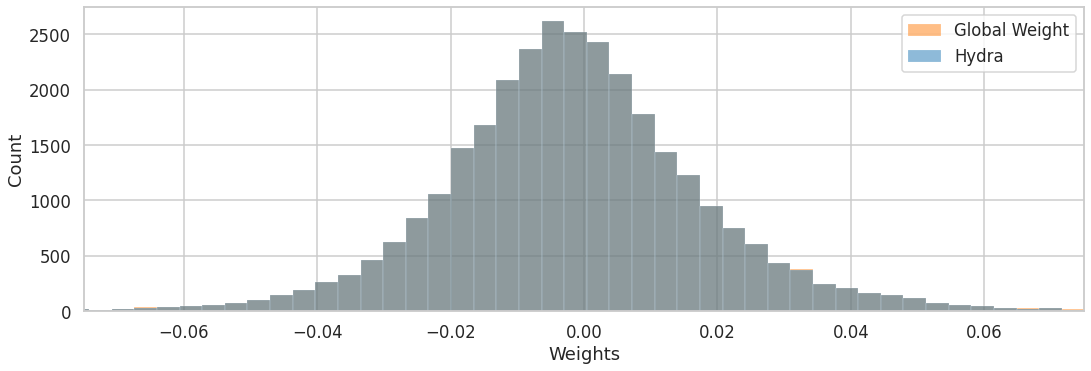

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
#for a in ["global_weight", "Hydra"]:
sns.histplot(combine_80, bins=500, ax=ax, x="weights", multiple="layer", hue="Method")
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Hydra Weight Distribution at Prune Ratio 80")
plt.legend(labels=["Global Weight","Hydra"])
plt.savefig(f"figures/combined_gw_hy_80_weight_dist.pdf")
plt.show()

In [135]:
resnet=create_network('imagenet', 'resnet18', 100, base_model)
l1_10_model=prune(resnet, "layer_weight", 10).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
l1_20_model=prune(resnet, "l1_channels", 20).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
l1_40_model=prune(resnet, "l1_channels", 40).network
resnet=create_network('imagenet', 'resnet18', 100, base_model)
l1_80_model=prune(resnet, "l1_channels", 80).network

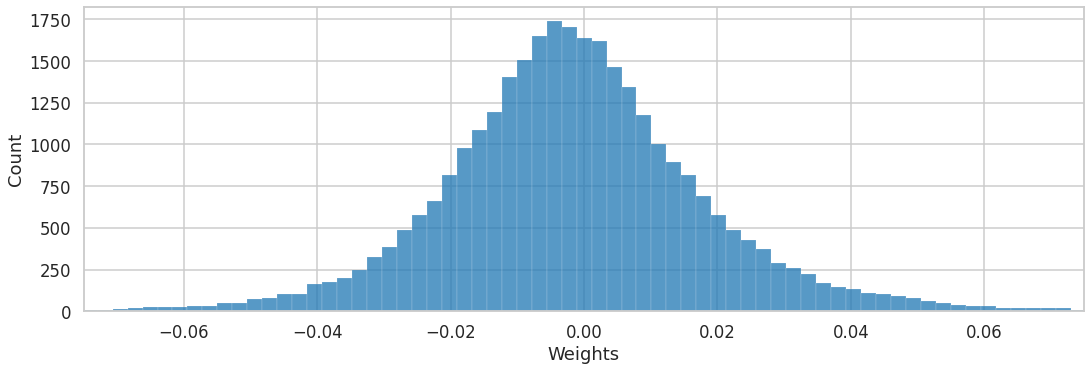

In [136]:
weights_gw_10=[]
for name, param in l1_10_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 10")
plt.savefig(f"figures/l1_10_weight_dist.pdf")
plt.show()

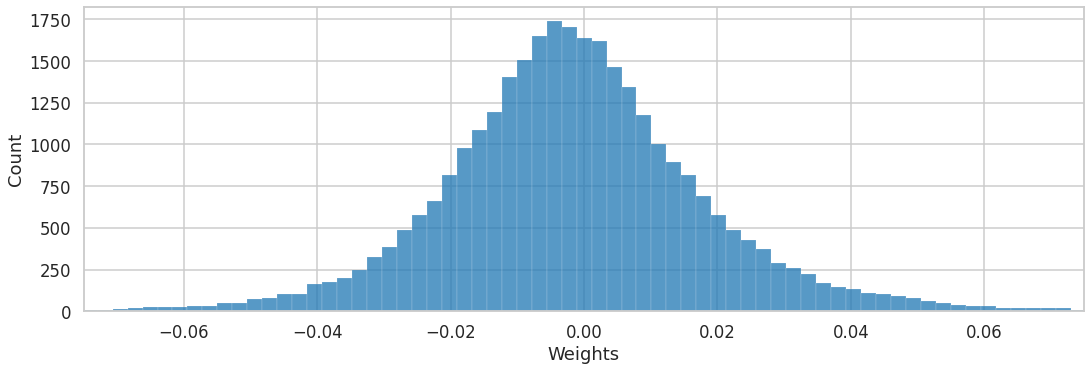

In [131]:
weights_gw_10=[]
for name, param in l1_20_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 10")
plt.savefig(f"figures/l1_20_weight_dist.pdf")
plt.show()

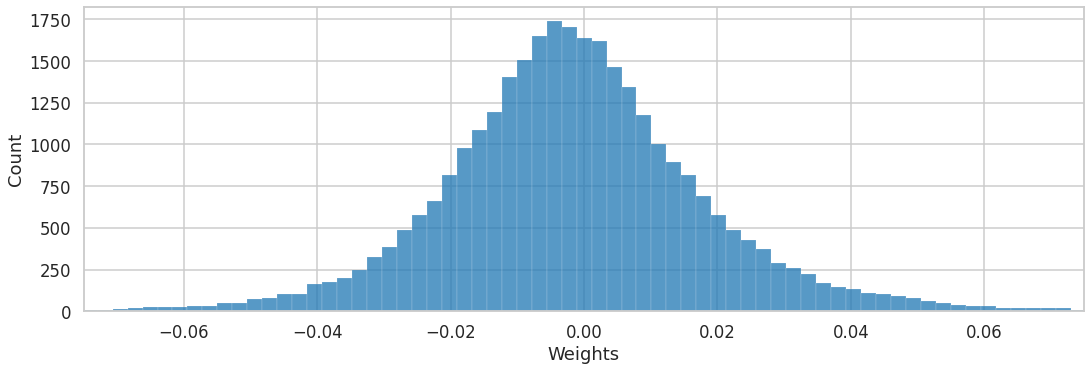

In [132]:
weights_gw_10=[]
for name, param in l1_40_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 10")
plt.savefig(f"figures/l1_40_weight_dist.pdf")
plt.show()

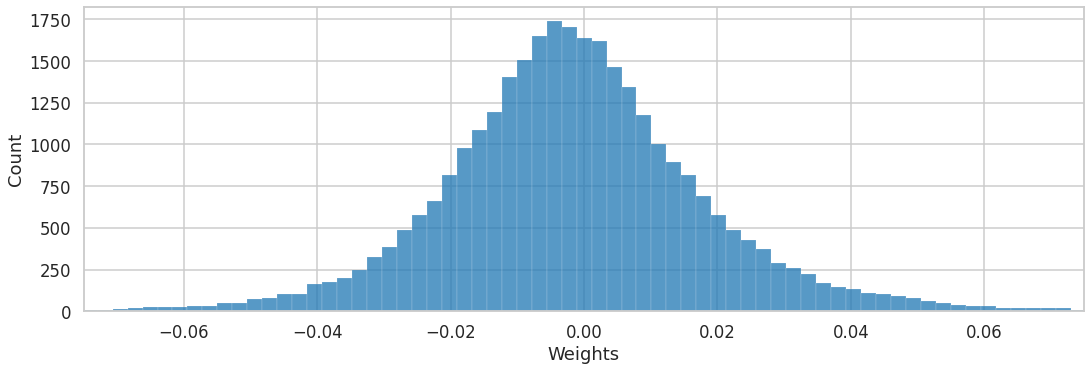

In [133]:
weights_gw_10=[]
for name, param in l1_80_model.named_parameters():
    #print(name)
    if 'conv' in name and 'weight' in name:
        #print(name)
        weights_gw_10.append(param.data.cpu().numpy()[0].flatten())
#print(weights_gw_10)
weights_gw_10 = np.array(weights_gw_10, dtype=object).flatten()
weights=[]
for a in weights_gw_10:
    for b in a:
        weights.append(b)
df=pd.DataFrame(weights)
df = df.rename(columns = {0: 'weights'}, inplace = False)
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.5))
sns.histplot(df, x="weights", bins=500, ax=ax)
ax.set_xlabel("Weights")
plt.xlim(-0.075,0.075)
plt.tight_layout()
#plt.title("Global Weight Pruning Weight Distribution at Prune Ratio 10")
plt.savefig(f"figures/l1_80_weight_dist.pdf")
plt.show()